In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import random as random
from matplotlib import pyplot as plt
import math
import time

In [130]:
# importing the dataset
data_raw = pd.read_csv("C:\\Users\\or.hirshman\\Documents\\learning\\DS_Projects\\Mall_Customers_Clustering_Analysis\\Mall_Customers.csv")
data_raw.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [131]:
#Remove id
del data_raw['CustomerID']

In [132]:
# Drop categorical variable
data_no_gender = data_raw[data_raw.columns[1:]]

In [133]:
# Scale  data using StandardScaler 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_no_gender)
scaled_data = pd.DataFrame(x_scaled, columns=data_no_gender.columns)
scaled_data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


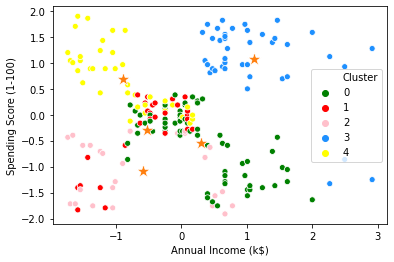

In [470]:
KMeans_implementation(scaled_data , 5)

In [469]:
# Implement KMeans
def KMeans_implementation(data , k):
    #Create and plot initial random centroids
    init_centroids = initiate_random_centroids(data, k)

    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)' ,data=data, s=12);
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', marker='*' ,data=init_centroids, s=200);
    
    #time.sleep(5)
    
    old_centroids = init_centroids  
    while(True):
        plt.clf()
        new_centroids = improve_centroids(data, old_centroids, k)

        if old_centroids.equals(new_centroids):
            break
        old_centroids = new_centroids

In [380]:
def improve_centroids(data, centroids, k):
     #Find for each observation the closest centroid and plot
        clustered_data = get_clustered_data(data , centroids)
        sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="Cluster" ,data=clustered_data, palette=['green','red','pink','dodgerblue','yellow']);

        # Find new centroid for each cluster
        new_centroids = find_clusters_centers(clustered_data, k)
        sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', marker='*' ,data=new_centroids, s=200);
        
        return new_centroids

In [464]:
def initiate_random_centroids(data, k):
    random_centroids = data.sample(n=k, random_state=114)
    return random_centroids

In [259]:
# Calculate nearest centroid for each observation
def get_clustered_data(data , centroids): 
    centroids_dict = {}
    for index_data, row_data in data.iterrows():
        centroid_id = 0
        for index_centroids, row_centroids in centroids.iterrows():
            distance = euclidean_distance(row_data, row_centroids)
            if index_data not in centroids_dict:
                centroids_dict[index_data] = (centroid_id, distance)
            elif centroids_dict[index_data][1] > distance:
                centroids_dict[index_data] = (centroid_id, distance)
            centroid_id+=1                
    curr_centroids = [] 
    for key, value in centroids_dict.items():
        curr_centroids.append(value[0])
    
    data['Cluster'] = curr_centroids
    return data

In [199]:
def find_clusters_centers(data, k):
    
    new_centroids = []
    
    data_by_clusters = data.groupby('Cluster')
    for cluster_i, data_i in data_by_clusters:
        new_centroid = find_cluster_center(data_i)
        new_centroids.append(new_centroid)
        
    new_centroids_df = pd.DataFrame(new_centroids, columns=data.columns)
    return new_centroids_df

In [207]:
def find_cluster_center(cluster_data):
    centroid= cluster_data.apply(lambda x: np.mean(x.tolist(), axis=0))
    return centroid

In [110]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

In [16]:
# Run SKlearn K means without Gender for 5 clusters- for comparison

kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_data)
identified_clusters = kmeans.predict(scaled_data)

In [20]:
#Appending the identified clusters to the dataframe without gender
clustered_data = data.copy()
clustered_data['Cluster'] = identified_clusters
clustered_data.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,4


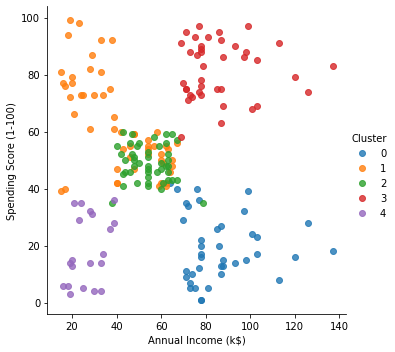

In [22]:
# Plot the 5 clusters Income vs Score
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=clustered_data,hue='Cluster',fit_reg=False)